In [249]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import scipy.stats as stats

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [112]:
claim = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Basic python case study\Python Foundation Case Study 3 - Insurance Claims Case Study\claims.csv")
claim.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No


In [113]:
cust = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Basic python case study\Python Foundation Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
cust.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum


In [114]:
cust_claim = pd.merge(left = cust, right = claim, left_on = 'CUST_ID', right_on = 'customer_id', how = 'inner')
cust_claim.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [115]:
cust_claim.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [116]:
cust_claim['DateOfBirth']=pd.to_datetime(cust_claim['DateOfBirth'])
cust_claim['claim_date']=pd.to_datetime(cust_claim['claim_date'])
cust_claim.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.


In [117]:
cust_claim['claim_amount']=cust_claim['claim_amount'].str.replace('$','')

C:\Users\mohit\AppData\Local\Temp\ipykernel_11568\666018213.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claim['claim_amount']=cust_claim['claim_amount'].str.replace('$','')


In [118]:
cust_claim['claim_amount'] = cust_claim['claim_amount'].astype('float64')

In [119]:
cust_claim['claim_amount'] = pd.to_numeric(cust_claim['claim_amount'])

In [120]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   customer_id          1085 non-null   int64         
 8   incident_cause       1085 non-null   object        
 9   claim_date           1085 non-null   datetime64[ns]
 10  claim_area           1085 non-null   object        
 11  police_report        1085 non-null   object        
 12  claim_type           1085 non-null   object        
 13  claim_amount         1020 non-nul

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.


In [121]:
cust_claim['unreported_claims']=np.where(cust_claim.police_report=='Unknown',1,(cust_claim.police_report=='No'))
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_claims
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,1
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,1
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,1


### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [122]:
cust_claim=cust_claim.drop_duplicates(subset='customer_id')
cust_claim                             

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_claims
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,1
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,1
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,0
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,1
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,0
1083,11256802,Female,2064-10-22,LA,469-345-5617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,1


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [124]:
cust_claim['claim_amount']=cust_claim['claim_amount'].replace(np.NaN,cust_claim['claim_amount'].mean())
cust_claim['claim_amount'].isna().sum()

0

In [128]:
cust_claim['total_policy_claims']=cust_claim['total_policy_claims'].replace(np.NaN,cust_claim['total_policy_claims'].mean())
cust_claim['total_policy_claims'].isna().sum()

0

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria 
##### Children < 18
##### Youth 18-30
##### Adult 30-60
##### Senior > 60

In [135]:
cust_claim.loc[(cust_claim.DateOfBirth.dt.year>2020),'DateOfBirth'] = cust_claim.loc[cust_claim.DateOfBirth.dt.year>2020]['DateOfBirth'].apply(lambda x : x-pd.DateOffset(years=100))
cust_claim['Age'] = cust_claim.claim_date.dt.year - cust_claim.DateOfBirth.dt.year 
cust_claim.loc[(cust_claim.Age<18),'Age_Group']='Children'
cust_claim.loc[(cust_claim.Age>=18)&(cust_claim.Age<30),'Age_Group']='Youth'
cust_claim.loc[(cust_claim.Age>=30)&(cust_claim.Age<60),'Age_Group']='Adult'
cust_claim.loc[cust_claim.Age>=60,'Age_Group']='Senior'
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_claims,Age,Age_Group
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,38,Adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1,48,Adult
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,1,34,Adult
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,1,32,Adult
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,1,41,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,0,37,Adult
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,1,21,Youth
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,0,27,Youth
1083,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,1,53,Adult


### 8. What is the average amount claimed by the customers from various segments?


In [136]:
average_amount_segment_wise=cust_claim.groupby('Segment')[['claim_amount']].mean()
average_amount_segment_wise

,claim_amount
Segment,
Gold,12756.479697
Platinum,12369.304648
Silver,12269.434851


### 9. What is the total claim amount based on incident cause for all the claimsthat have been done at least 20 days prior to 1st of October, 2018.


In [144]:
round(cust_claim.loc[cust_claim.claim_date < '2018-09-10'].groupby('incident_cause')[['claim_amount']].sum(),2)

,claim_amount
incident_cause,
Crime,724462.49
Driver error,3264285.98
Natural causes,1312705.99
Other causes,3725038.47
Other driver error,3318806.48


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [145]:
adult_group = cust_claim.loc[cust_claim.Age_Group=='Adult']
adult_group_states = adult_group.loc[(adult_group.State=='TX')|(adult_group.State=='DE')|(adult_group.State=='AK')]
driver = adult_group_states.loc[(adult_group_states.incident_cause=='Driver error')|(adult_group_states.incident_cause=='Other driver error')]
driver.groupby('State')[['CUST_ID']].count()

,CUST_ID
State,
AK,8
DE,9
TX,7


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


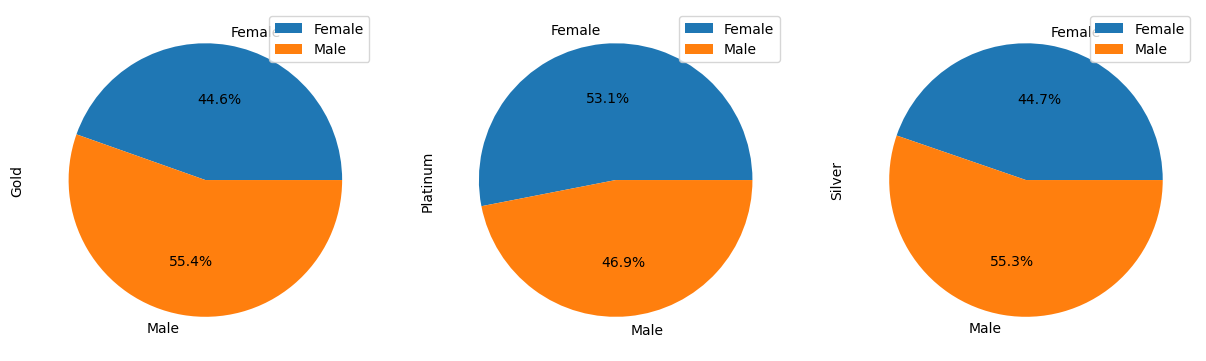

In [156]:
table = pd.pivot_table(data = cust_claim, index = 'gender',columns = 'Segment',values='claim_amount',aggfunc = 'sum').plot(kind='pie',subplots = True,figsize=(15,15),autopct='%0.1f%%')

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

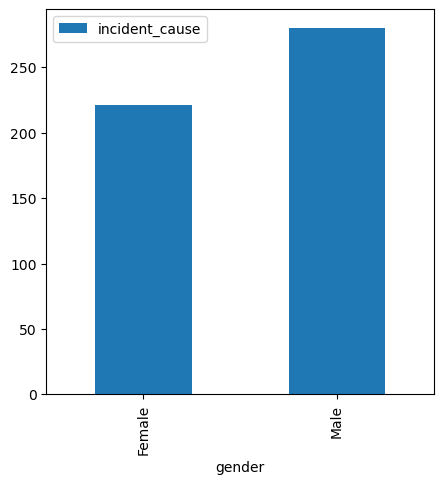

In [267]:
driver_error = cust_claim.loc[(cust_claim.incident_cause=='Driver error')|(cust_claim.incident_cause=='Other driver error')]
driver_error.groupby('gender')[['incident_cause']].count().plot(kind='bar',figsize=(5,5))
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

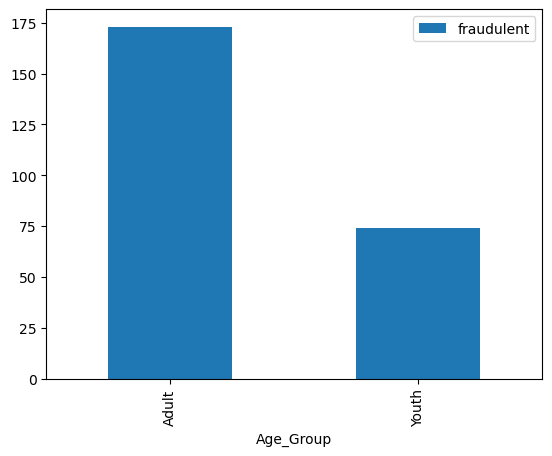

In [164]:
fraud = cust_claim.loc[cust_claim.fraudulent=='Yes']
fraud.groupby('Age_Group')[['fraudulent']].count().plot(kind='bar')
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

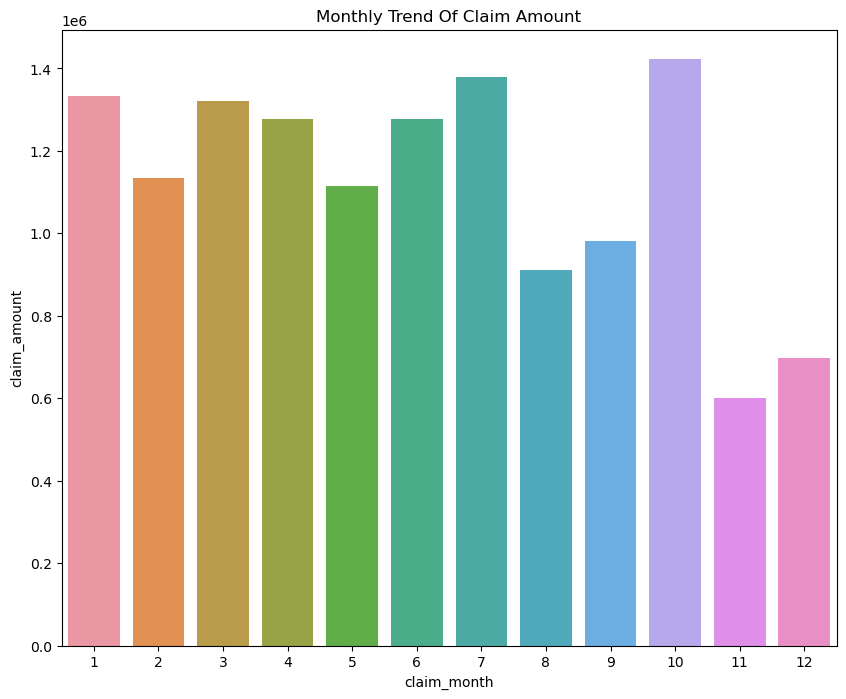

In [190]:
cust_claim['claim_month'] = cust_claim.claim_date.dt.month
monthly_claim_amount = round(cust_claim.groupby('claim_month')[['claim_amount']].sum().reset_index(),2)
plt.figure(figsize = (10,8))
sns.barplot(data = monthly_claim_amount, x = 'claim_month', y = 'claim_amount')
plt.title('Monthly Trend Of Claim Amount')
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [210]:
fraud_claim_amount = cust_claim.loc[cust_claim.fraudulent=='Yes'].groupby(['gender','Age_Group'])[['claim_amount']].mean().reset_index()
fraud_claim_amount

,gender,Age_Group,claim_amount
0,Female,Adult,12462.083235
1,Female,Youth,7599.124835
2,Male,Adult,17062.198724
3,Male,Youth,10683.552515


In [211]:
nonfraud_claim_amount = cust_claim.loc[cust_claim.fraudulent=='No'].groupby(['gender','Age_Group'])[['claim_amount']].mean().reset_index()
nonfraud_claim_amount

,gender,Age_Group,claim_amount
0,Female,Adult,12383.774926
1,Female,Youth,12522.417294
2,Male,Adult,12183.729275
3,Male,Youth,12217.043202


In [216]:
average_claim = pd.merge(left=fraud_claim_amount,right=nonfraud_claim_amount,on=['gender','Age_Group'],how='inner',suffixes = ('_Fraud','_Non_Fraud'))
average_claim

,gender,Age_Group,claim_amount_Fraud,claim_amount_Non_Fraud
0,Female,Adult,12462.083235,12383.774926
1,Female,Youth,7599.124835,12522.417294
2,Male,Adult,17062.198724,12183.729275
3,Male,Youth,10683.552515,12217.043202


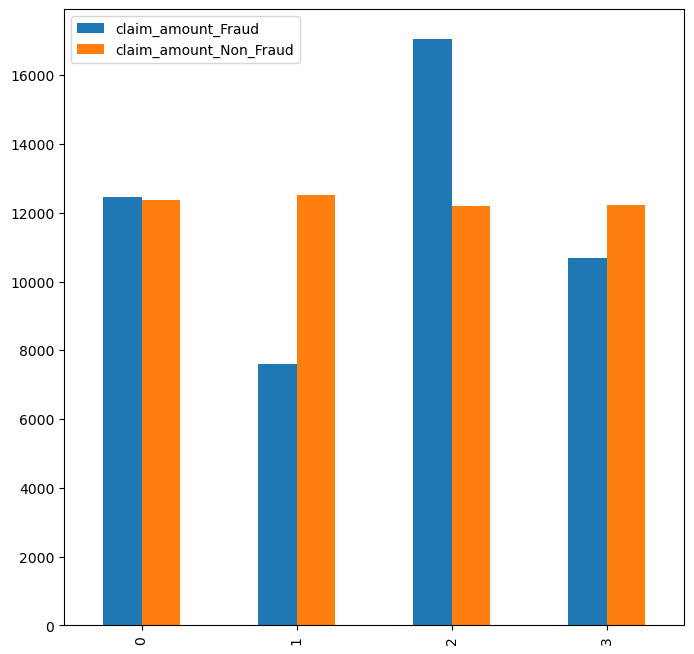

In [226]:
average_claim.plot(kind='bar',figsize=(8,8))
plt.show()

## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 
#### 16. Is there any similarity in the amount claimed by males and females?


In [252]:
u_m = cust_claim.loc[cust_claim.gender=='Male'].claim_amount
u_m

6        2680.0
8       38306.5
10       1730.0
11       1160.0
12       2620.0
         ...   
1077     2290.0
1078     2320.0
1079     2173.5
1082    33080.0
1084     1490.0
Name: claim_amount, Length: 551, dtype: float64

In [253]:
u_f = cust_claim.loc[cust_claim.gender=='Female'].claim_amount
u_f

0        2980.0
1        2980.0
2        3369.5
4        1680.0
13       2748.5
         ...   
1072    38950.0
1076     1380.0
1080     1770.0
1081     2800.0
1083     2840.0
Name: claim_amount, Length: 527, dtype: float64

In [255]:
print('mean of male customers claim amount',u_m.mean())
print('mean of female customers claim amount',u_f.mean())

mean of male customers claim amount 12822.81660016878
mean of female customers claim amount 12102.135592140887


In [256]:
stats.f_oneway(u_m,u_f)

F_onewayResult(statistic=0.7829955562662301, pvalue=0.3764242430542767)

### 17. Is there any relationship between age category and segment?

In [263]:
obs_fre_table = pd.crosstab(cust_claim.Segment,cust_claim.Age_Group)
obs_fre_table

Age_Group,Adult,Youth
Segment,,
Gold,267,104
Platinum,244,117
Silver,245,101


In [265]:
stats.chi2_contingency(obs_fre_table)

(1.786085862056675,
 0.40940805491231314,
 2,
 array([[260.18181818, 110.81818182],
        [253.16883117, 107.83116883],
        [242.64935065, 103.35064935]]))

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [266]:
mean = cust_claim.claim_amount.mean()
mean
# as mean improoved significantly so to proove we need to validate our hypothesis by performing t-test

12470.498519249744

In [267]:
stats.ttest_1samp(cust_claim.claim_amount,10000)

Ttest_1sampResult(statistic=6.068796577191385, pvalue=1.7827316562159517e-09)

### 19. Is there any difference between age groups and insurance claims?

In [274]:
ag = cust_claim.loc[cust_claim.Age_Group=='Adult','total_policy_claims']
ag

0       1.0
1       3.0
2       1.0
4       1.0
6       1.0
       ... 
1076    3.0
1077    1.0
1079    1.0
1080    1.0
1083    4.0
Name: total_policy_claims, Length: 756, dtype: float64

In [276]:
yg = cust_claim.loc[cust_claim.Age_Group=='Youth','total_policy_claims']
yg

10      4.0
11      3.0
12      1.0
15      1.0
16      1.0
       ... 
1067    5.0
1078    3.0
1081    1.0
1082    2.0
1084    1.0
Name: total_policy_claims, Length: 322, dtype: float64

In [277]:
stats.f_oneway(ag,yg)

F_onewayResult(statistic=0.5490355624122759, pvalue=0.45887370019389573)

### 20. Is there any relationship between total number of policy claims and the claimed amount?


In [279]:
stats.pearsonr(cust_claim.total_policy_claims,cust_claim.claim_amount)

PearsonRResult(statistic=-0.014291136186627364, pvalue=0.6392846937920396)